## Plotting HI Intensity Maps
This notebook imports the simulated data and plots HI intensity maps using plt.imshow(). This is done to illustrate what the cosmological HI signal and foregrounds look like. The plots produced effectively illustrate why foreground removal is so crucial when using HI intensity mapping as a cosmological probe. 

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
%matplotlib inline

font = {"size": 16, "family": "STIXGeneral"}
axislabelfontsize = "x-large"
plt.rc("font", **font)
plt.rcParams["text.usetex"] = True

In [63]:
### LOAD IN THE DATA ###
T_HI = np.load('MultiDarkSims/dT_HI.npy')    #HI intensity map
T_FG = np.load('MultiDarkSims/dT_FG.npy')     #foreground map
nx,ny,nz = np.shape(T_HI)

The data used here comes from https://github.com/IntensityTools/MultipoleExpansion and corresponds to a redshift of z=0.82. <br/>
more info about the data, as well: frequency range, mention the shape and the physical dimensions of the image and the units of intenisties/temperatures 

In [64]:
T_ALL = T_HI + T_FG #combine signal and foreground

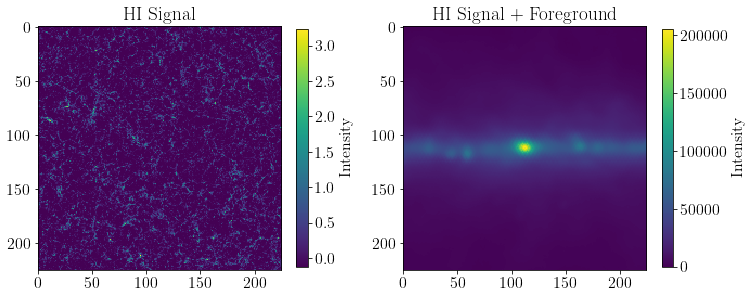

In [65]:
#### PLOT THE INTESTY MAPS FOR COSMLOGIAL HI SIGNAL AND FOREGROUNDS ####

n = 0          #nz value to plot
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(wspace=0.2)

#plot cosmological HI 
plt.subplot(121)
plt.imshow(T_HI[:,:,n])
plt.title("HI Signal")
plt.colorbar(label = "Intensity", shrink = 0.73)

#plot signal plus foreground
plt.subplot(122)
plt.imshow(T_ALL[:,:,n])
plt.title("HI Signal + Foreground")
plt.colorbar(label="Intensity", shrink = 0.73)

#plt.savefig("plots/HI-intensity-maps.png")

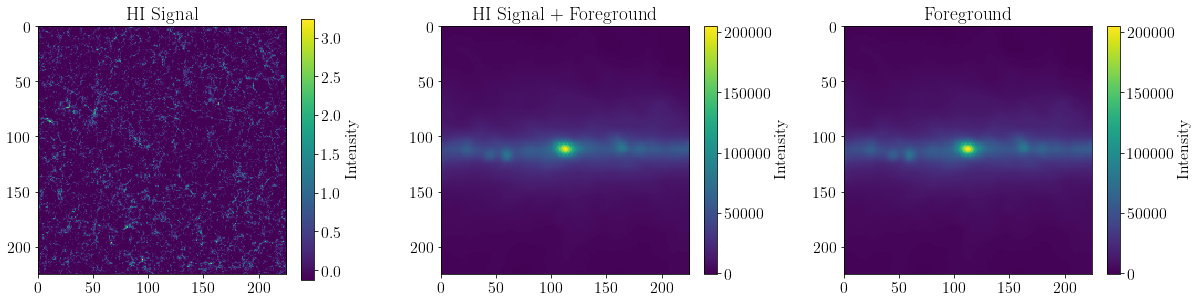

In [66]:
### PLOT HI SIGNAL, SIGNAL + FOREGROUND and FOREGROUND ALONE ###

n = 0 #index of map to be plotted from data cube
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(wspace=0.3)

#plot HI intensity map 
plt.subplot(131)
plt.imshow(T_HI[:,:,n])
plt.title("HI Signal")

plt.colorbar(label = "Intensity", shrink = 0.6)

#plot HI intenisty map with foreground
plt.subplot(132)
plt.imshow(T_ALL[:,:,n])
plt.title("HI Signal + Foreground")
plt.colorbar(label="Intensity", shrink = 0.57)

#plot cleaned data
plt.subplot(133)
plt.imshow(T_FG[:,:,n])
plt.title("Foreground")
plt.colorbar(label = "Intensity", shrink = 0.57)

plt.savefig("plots/test.png")                       #change filename

### Smoothly varying Foregrounds
The following blocks show the intensity of the foreground as a function of frequency. This illustrates that the foreground varies smoothly with frequency. <br/> 
This is shown for the mean frequency of each map (both with and without mean-centring the data cube) and also for the intensity of a specific pixel of each map. For all of these the general trend of foreground intesnity varing smoothly with frequency is clear. 

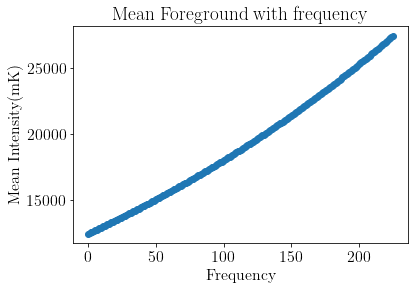

In [67]:
### PLOT OF VARIATION OF FOREGROUND MEAN WITH FREQUENCY###

fg_mean = np.zeros(nz)
for i in range(nz):         #find mean intensity of foreground for each map 
    r_mean = np.mean(T_FG[:,:,i])
    fg_mean[i] = r_mean

x = np.linspace(0,225,num=225)

plt.scatter(x,fg_mean)
plt.title("Mean Foreground with frequency")
plt.xlabel("Frequency")
plt.ylabel("Mean Intensity(mK)")
plt.show()

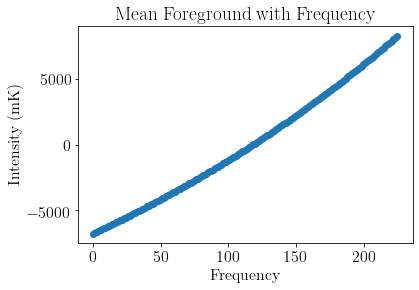

In [69]:
### PLOT OF VARIATION OF FOREGROUND MEAN ALONG LINE OF SIGHT AFTER MEAN-CENTRING FOREGROUND###

dT_FG = T_FG - np.mean(T_FG)
fg_mean = np.zeros(nz)
for i in range(nz): 
    r_mean = np.mean(dT_FG[:,:,i])
    fg_mean[i] = r_mean

x = np.linspace(0,225,num=225)

plt.scatter(x,fg_mean)
plt.title("Mean Foreground with Frequency")
plt.xlabel("Frequency")
plt.ylabel("Intensity (mK)")
plt.show()

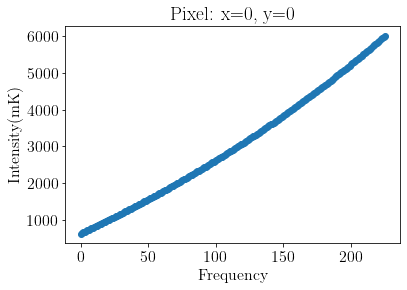

In [72]:
### PLOT OF FOREGROUND MEAN WITH FREQUENCY OVER ONE PIXEL###
x_pix = 0    #set x and y value to show variance over
y_pix = 0

fg = T_FG[x_pix,y_pix,:]
x = np.linspace(0,225,num=225)

plt.scatter(x,fg)
plt.title("Pixel: x="+str(x_pix)+', y='+str(y_pix))
plt.xlabel("Frequency")
plt.ylabel("Intensity(mK)")
plt.show()